# Exectutive Summary

1. Peak sales seem to be in 2008. Perhaps this is a result of the economic crisis and subsequent layoffs forcing people into increased video game usage.

2. It appears that North America had the most sales with almost 2x as many as the EU and 3x as many as Japanese markets during the peak sales period.

3. Platform and Shooter games are biggest in NA (big surprise), and EU, While Role-Playing games are most popular in Japan with almost 5 million games of that genre sold.

4. Wii seems to be performing well in terms of sales in all markets.

5. Action, Shooter, and Sports games appear to be on the rise from 2010 onward in NA and EU. In JP, the most upward trending games tended to be role-playing and action games.

6. Year, Platform, and Genre are extremely important features regarding video game sales. The Wii is the important platform along with Nintendo DS. Sports, Racing, and Platform games are the most important in predicting sales.


# Introduction

You work for a data science consulting company. A major video game production company, has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below).

## Questions



1. What are some major differences between the North American, European, and Japanese video game markets?

2. What video game genres are trending in each market?

3. What features about a video game are most indicative of its success?

## Data Description

This dataset contains a list of video games with sales greater than 100,000 copies.

*Rank* - Ranking of overall sales*

*Name* - The games name

*Platform* - Platform of the games release (i.e. PC,PS4, etc.)

*Year* - Year of the game's release

*Genre* - Genre of the game

*Publisher* - Publisher of the game

*NA_Sales* - Sales in North America (in millions)

*EU_Sales* - Sales in Europe (in millions)

*JP_Sales* - Sales in Japan (in millions)

*Other_Sales* - Sales in the rest of the world (in millions)

*Global_Sales* - Total worldwide sales.

# Load Packages and Import Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set seaborn look
sns.set(context = "notebook", style = "darkgrid", palette = "colorblind", font = "sans-serif", font_scale = 1.5)

In [3]:
vgdta = pd.read_csv("vgsales.csv")

## Inspect Data

In [4]:
vgdta.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
vgdta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# EDA and Data Cleaning

## EDA

In [6]:
vgdta.describe(include = 'all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


There are 16,598 games from 578 game publishers produced from 1980 to 2020.The top game is *Need for Speed:Most Wanted* and the top publisher is *Electronic Arts*.

### Explore Missing Values

In [7]:
vgdta.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Missing values are appearing in categories of Year (271 missing) and Publisher (58 missing).

In [8]:
vgdta.isna().mean(axis=0)

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

### Exclude Missing Data

In [9]:
vgdta2 = vgdta.dropna(axis=0) #removing NAs

In [10]:
vgdta2.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Plot Global Sales

In [11]:
vgdta2.sort_values('Global_Sales', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16183,16186,Sakura-Sou no Pet na Kanojo,PSP,2013.0,Adventure,Kadokawa Games,0.00,0.00,0.01,0.00,0.01
16184,16187,Fatal Fury: Battle Archives Volume 2 (JP sales),PS2,2007.0,Fighting,SNK Playmore,0.00,0.00,0.01,0.00,0.01
16185,16188,Tantei Jinguuji Saburo: Hai to Diamond,PSP,2009.0,Adventure,Arc System Works,0.00,0.00,0.01,0.00,0.01
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [12]:
vgdta2['year'] = vgdta2['Year'].astype(int).astype(str)

<ipython-input-12-289a6e897e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgdta2['year'] = vgdta2['Year'].astype(int).astype(str)


No handles with labels found to put in legend.


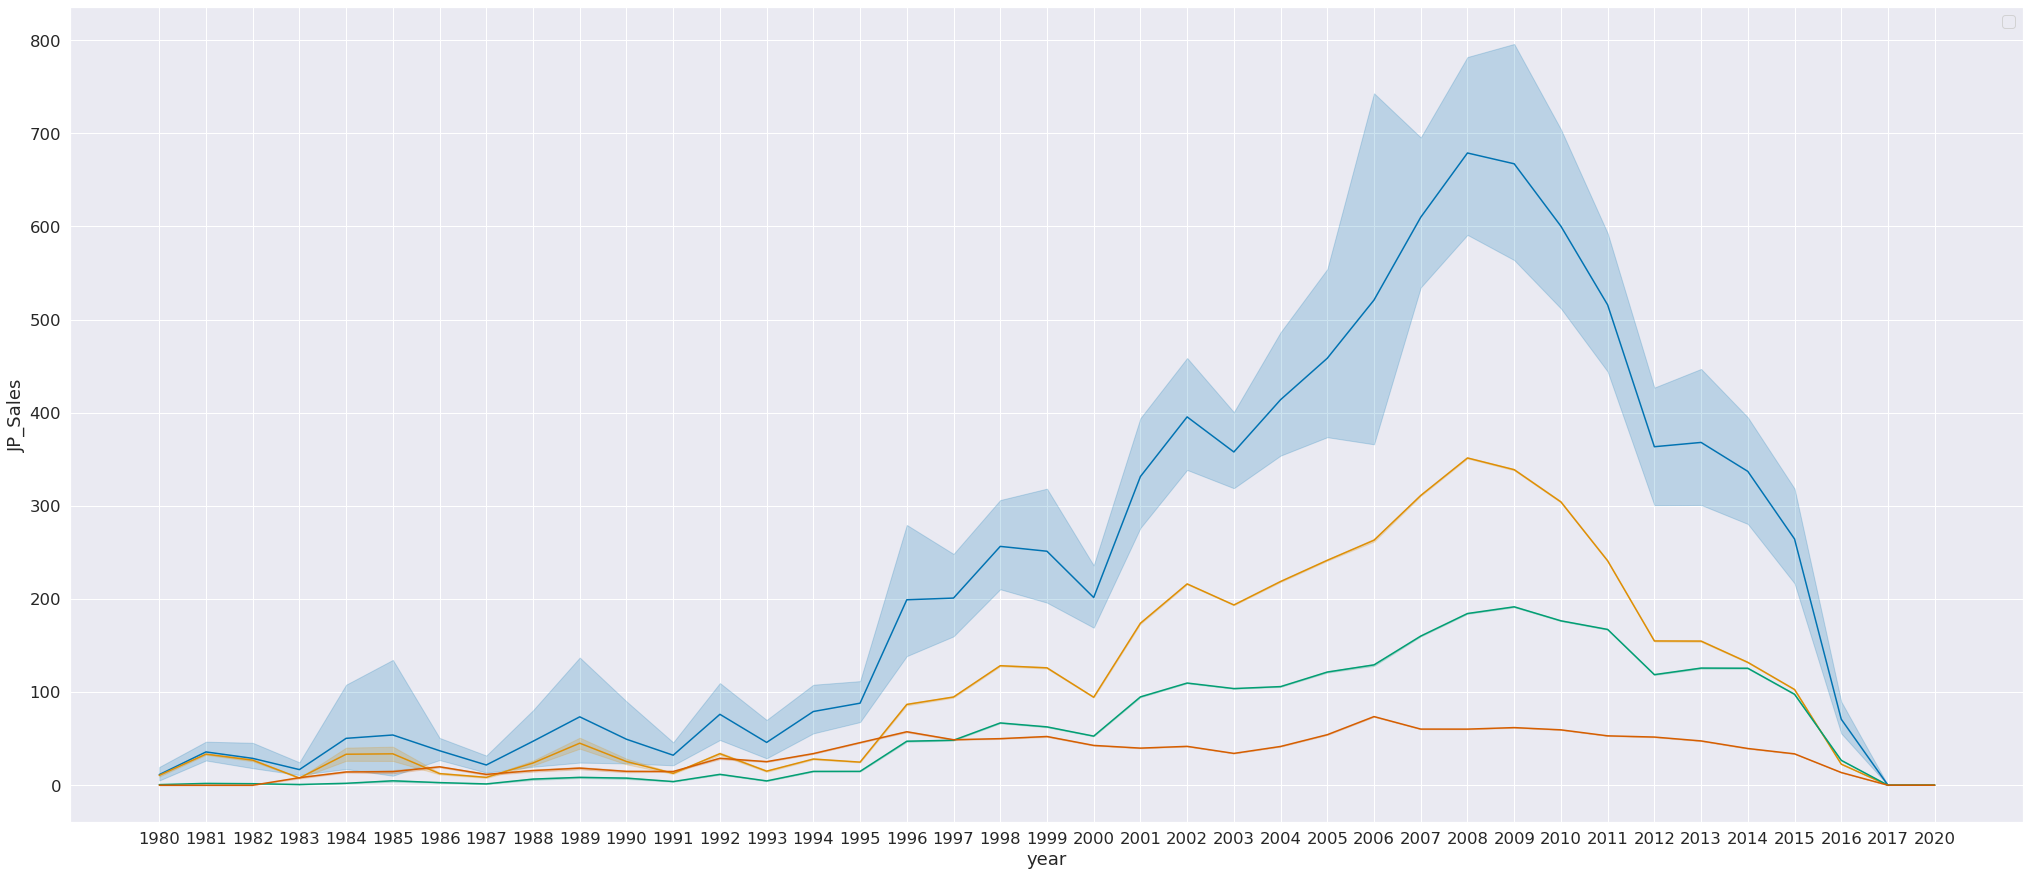

In [13]:
fig,ax = plt.subplots(figsize=(35,15))
sns.lineplot(x='year', y="Global_Sales", 
            data=vgdta2, ax = ax, estimator=sum)
sns.lineplot(x='year', y="NA_Sales", 
            data=vgdta2, 
            ci='sd', ax = ax, estimator = sum)
sns.lineplot(x='year', y="EU_Sales", 
            data=vgdta2, estimator = sum, 
            ci='sd', ax = ax)
sns.lineplot(x='year', y="JP_Sales", 
            data=vgdta2, 
            ci='sd', ax = ax, estimator = sum)
ax.legend()

# Show plot
plt.show()

**Finding: Peak sales seem to be in 2008. Perhaps this is a result of the economic crisis and subsequent layoffs forcing people into increased video game usage.**

### Investigate Sales in Different Markets: North America, EU, Japan

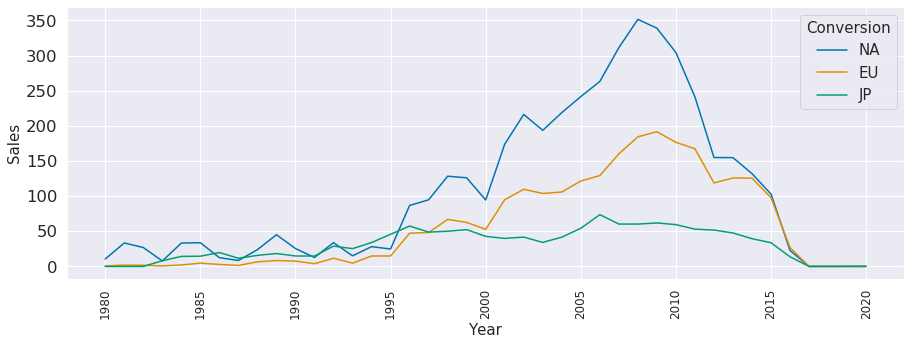

In [14]:
fig2 = plt.figure(figsize = (15,5))

plt.subplot(1,1,1)

a = sns.lineplot(x = "Year", y = "NA_Sales", data = vgdta2[["Year", "NA_Sales"]].groupby("Year").sum().reset_index())
sns.lineplot(x = "Year", y = "EU_Sales", data = vgdta2[["Year", "EU_Sales"]].groupby("Year").sum().reset_index())
sns.lineplot(x = "Year", y = "JP_Sales", data = vgdta2[["Year", "JP_Sales"]].groupby("Year").sum().reset_index())
a.legend(["NA","EU","JP"], loc = 'upper right', fontsize = 15, title = 'Conversion', title_fontsize = 15)
a.set_ylabel('Sales', fontsize = 15)
a.set_xlabel('Year', fontsize = 15)
a.tick_params(axis = 'x', labelsize=12, rotation = 90)

**Finding: It appears that North America had the most sales with almost 2x as many as the EU and 3x as many as Japanese markets during the peak sales period.**

### Look at Video Game Sale Counts by Genre and Platform in Millions

In [15]:
vgsales_long = pd.melt(vgdta2, id_vars = ["Rank", "Year", "Name", "Platform", "Genre", "Publisher"], value_vars = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"], var_name = "market", value_name = "million_sales")

In [16]:
vgsales_long.head()

,Rank,Year,Name,Platform,Genre,Publisher,market,million_sales
0,1,2006.0,Wii Sports,Wii,Sports,Nintendo,NA_Sales,41.49
1,2,1985.0,Super Mario Bros.,NES,Platform,Nintendo,NA_Sales,29.08
2,3,2008.0,Mario Kart Wii,Wii,Racing,Nintendo,NA_Sales,15.85
3,4,2009.0,Wii Sports Resort,Wii,Sports,Nintendo,NA_Sales,15.75
4,5,1996.0,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,NA_Sales,11.27


### Differences between different Video Game Markets

#### Visualize Sales by Genre

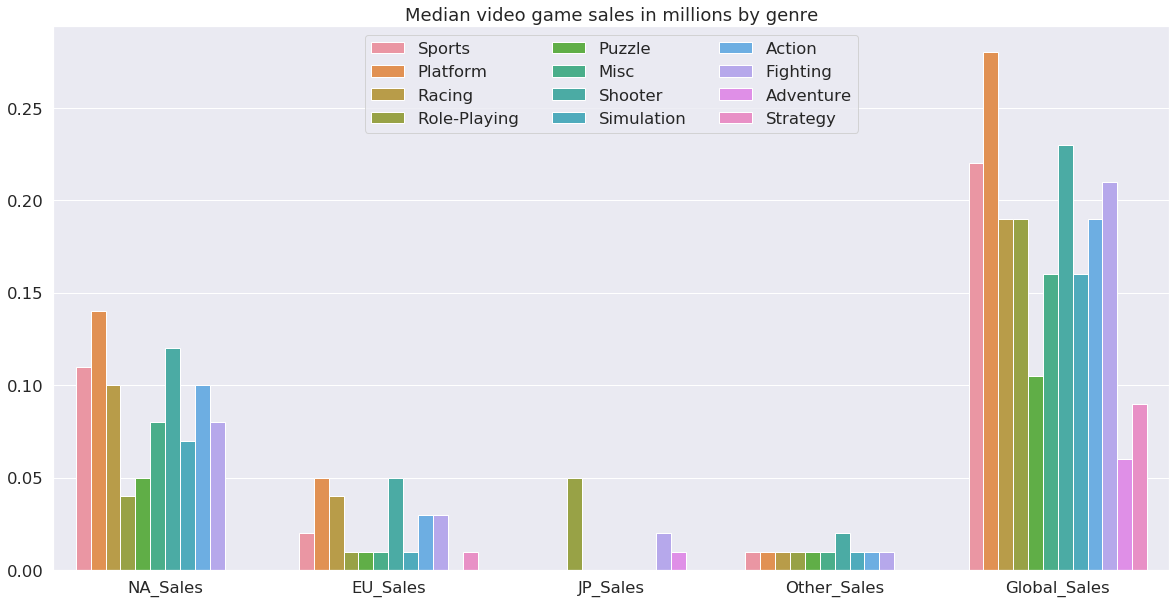

In [17]:
# figure size
plt.figure(figsize = (20, 10))

# bar plot medians
sns.barplot(x = vgsales_long["market"], y = vgsales_long["million_sales"], hue = vgsales_long["Genre"], estimator = np.median, ci = None)

# legend
plt.legend(loc = "upper center", ncol = len(vgsales_long["Genre"].unique()) // 4)

# titles
plt.title("Median video game sales in millions by genre")
plt.xlabel(None)
plt.ylabel(None);

**Finding: Platform and Shooter games are biggest in NA (big surprise), and EU, While Role-Playing games are most popular in Japan with almost 5 million games of that genre sold.**

#### Visualize Sales in Various Markets by Platform

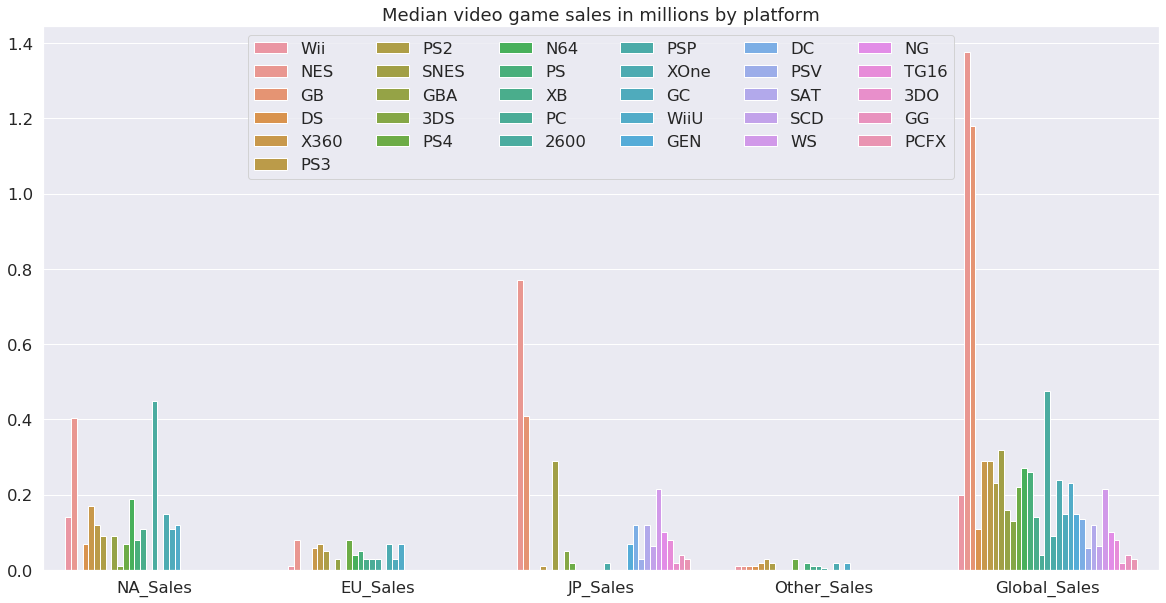

In [18]:
 #figure size
plt.figure(figsize = (20, 10))

# bar plot medians
sns.barplot(x = vgsales_long["market"], y = vgsales_long["million_sales"], hue = vgsales_long["Platform"], estimator = np.median, ci = None)

# legend
plt.legend(loc = "upper center", ncol = len(vgsales_long["Platform"].unique()) // 5)

# titles
plt.title("Median video game sales in millions by platform")
plt.xlabel(None)
plt.ylabel(None);

**Finding: Wii seems to be performing well in terms of sales in all markets.**

#### Visualize Trending Genres

<Figure size 1440x720 with 0 Axes>

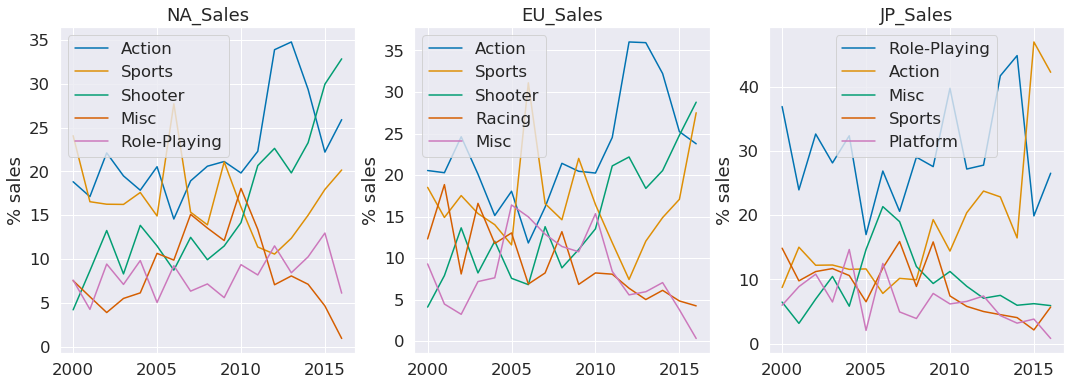

In [19]:
plt.figure(figsize = (20, 10))

yearly_sales = vgdta2.groupby('Year').sum()
yearly_sales.loc[2000].NA_Sales
sales = vgdta2[(vgdta2.Year>=2000) & (vgdta2.Year<=2016)].groupby(['Year','Genre']).sum()[['NA_Sales','EU_Sales','JP_Sales']].reset_index()
sales.NA_Sales /= sales.Year.apply(lambda x: yearly_sales.loc[x].NA_Sales) / 100
sales.EU_Sales /= sales.Year.apply(lambda x: yearly_sales.loc[x].EU_Sales) / 100
sales.JP_Sales /= sales.Year.apply(lambda x: yearly_sales.loc[x].JP_Sales) / 100

fig, axs = plt.subplots(1, 3, figsize=(18,6))
for ax,market in zip(axs, ['NA_Sales','EU_Sales','JP_Sales']):
    for genre in sales.groupby("Genre")[market].sum().sort_values(ascending=False).index.values[:5]:
        df_genre = sales[sales.Genre==genre]
        ax.plot(df_genre.Year, df_genre[market], label=genre)
    ax.set_ylabel('% sales')
    ax.set_title(market)
    ax.legend()

**Finding: Action, Shooter, and Sports games appear to be on the rise from 2010 onward in NA and EU. In JP, the most upward trending games tended to be role-playing and action games.**

# Modeling

## Feature Importance

**I will employ a Random Forest model to extract feature importance to determine what factors are the most dominant contributors to video game sales.**

In [20]:
vgdta2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,year
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996


In [21]:
vgdta2.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
ITT Family Games                   1
Mystique                           1
Otomate                            1
id Software                        1
Yumedia                            1
Name: Publisher, Length: 576, dtype: int64

**Finding: Too many different types of obscure video game publishers. Will make one-hot encoding difficult. Focus only on more popular game publishers.**

In [23]:
import category_encoders as ce

count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(vgdta2["Publisher"])
vgdta2 = vgdta2.join(count_encoded.add_suffix("_count"))

In [24]:
vgdta2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,year,Publisher_count
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006,696
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985,696
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008,696
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009,696
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996,696


**Given the amount of publishers. Just focus on Platform and Genre. They provided the strongest signal from previous investigations anyways.**

### One-hot encode Platform and Genre

In [26]:
from sklearn.preprocessing import OneHotEncoder

oh_cols = ["Platform","Genre"]

oh_enc = OneHotEncoder(sparse = False)
oh_df = pd.DataFrame(oh_enc.fit_transform(vgdta2[oh_cols]))
column_names = oh_enc.get_feature_names(oh_cols)
oh_df.columns = column_names
oh_df.index = vgdta2.index

vgdta2 = vgdta2.drop(oh_cols, axis = 1)
vgdta2 = pd.concat([vgdta2, oh_df], axis = 1)

In [27]:
vgdta2.head()

,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,year,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,Wii Sports,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,2006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Super Mario Bros.,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,1985,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Mario Kart Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,2008,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,Wii Sports Resort,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,Pokemon Red/Pokemon Blue,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,1996,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Drop unnecessary sales data

In [28]:
vgdta2.drop(["Name","Publisher", "Rank", "NA_Sales","EU_Sales","JP_Sales","Other_Sales"], axis = 1, inplace = True)

In [29]:
vgdta2.head()

,Year,Global_Sales,year,Publisher_count,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2006.0,82.74,2006,696,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1985.0,40.24,1985,696,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008.0,35.82,2008,696,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2009.0,33.00,2009,696,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1996.0,31.37,1996,696,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
vgdta2.isnull().sum()

Year                  0
Global_Sales          0
year                  0
Publisher_count       0
Platform_2600         0
Platform_3DO          0
Platform_3DS          0
Platform_DC           0
Platform_DS           0
Platform_GB           0
Platform_GBA          0
Platform_GC           0
Platform_GEN          0
Platform_GG           0
Platform_N64          0
Platform_NES          0
Platform_NG           0
Platform_PC           0
Platform_PCFX         0
Platform_PS           0
Platform_PS2          0
Platform_PS3          0
Platform_PS4          0
Platform_PSP          0
Platform_PSV          0
Platform_SAT          0
Platform_SCD          0
Platform_SNES         0
Platform_TG16         0
Platform_WS           0
Platform_Wii          0
Platform_WiiU         0
Platform_X360         0
Platform_XB           0
Platform_XOne         0
Genre_Action          0
Genre_Adventure       0
Genre_Fighting        0
Genre_Misc            0
Genre_Platform        0
Genre_Puzzle          0
Genre_Racing    

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

y_data = vgdta2['Global_Sales']
X_data = vgdta2.drop("Global_Sales", axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.30, random_state=1)

rf = RandomForestRegressor(n_estimators = 50)
rf.fit(X_train, y_train)

feature_importance = rf.feature_importances_


In [32]:
fi_df = pd.DataFrame(feature_importance)
cols = pd.DataFrame(vgdta2.drop("Global_Sales", axis = 1).columns)
feats = pd.concat([fi_df, cols], axis = 1)
feats.columns = ["importance", "feature"]
feats.head()


,importance,feature
0,1.984074e-01,Year
1,1.878714e-01,year
2,1.812224e-01,Publisher_count
3,9.397190e-04,Platform_2600
4,1.374888e-07,Platform_3DO


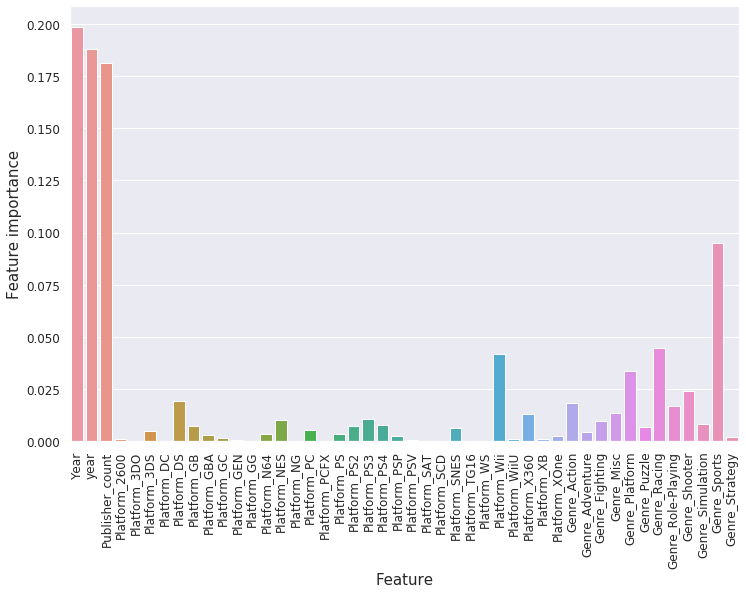

In [33]:
plt.figure(figsize = (12,8))

plt.subplot(1,1,1)

a = sns.barplot(x = 'feature', y = 'importance', data = feats)
a.set_ylabel('Feature importance', fontsize = 15)
a.set_xlabel('Feature', fontsize = 15)
a.tick_params(labelsize=12)
a.tick_params(axis = 'x', labelsize=12, rotation = 90)

**Finding: Year, Platform, and Genre are extremely important features regarding video game sales. The Wii is the important platform along with Nintendo DS. Sports, Racing, and Platform games are the most important in predicting sales.**